## An investigation of the Universal Approximation Theorem 
### <u>Neural Networks</u>

- Let us first try to learn a simple function using neural networks
### f(x) = 2x

In [104]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.autograd import Variable
import torch.optim as optim
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [312]:
def build_dataset_for_2_x():
    # Given f(x) = 2x, is_f_x defines whether the function is satisfied
    data = []
    for i in range(1,100):
        data.append((i, 2*i, 1)) # True
    for j in range(100, 201):
        data.append((j, 2*j+12, 0)) # Not true
    column_names = ["first_number","f_x", "is_f_x"]
    df = pd.DataFrame(data, columns=column_names)
    return df

In [313]:
df = build_dataset_for_2_x()
df.head()

,first_number,f_x,is_f_x
0,1,2,1
1,2,4,1
2,3,6,1
3,4,8,1
4,5,10,1


In [110]:
labels = df.is_f_x.values
features = df.drop(columns=['is_f_x']).values

In [111]:
features.shape

(200, 2)

In [112]:
labels.shape

(200,)

In [374]:
# Building nn
net = nn.Sequential(nn.Linear(features.shape[1],10), nn.Tanh(), nn.Linear(10, 10), nn.ReLU(),nn.Linear(10, 2))

In [375]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)

In [376]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [377]:
def train():
    net.train()
    losses = []
    for epoch in range(1,300):
        x_train = Variable(torch.from_numpy(features_train)).float()
        y_train = Variable(torch.from_numpy(labels_train)).long()
        y_pred = net(x_train)
        loss = criterion(y_pred, y_train)
        print ("epoch #", epoch)
        print (loss.item())
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [378]:
losses = train()

epoch # 1
0.7367300391197205
epoch # 2
0.7303361296653748
epoch # 3
0.7239254713058472
epoch # 4
0.7181443572044373
epoch # 5
0.7125107645988464
epoch # 6
0.7070106267929077
epoch # 7
0.7022601962089539
epoch # 8
0.697613000869751
epoch # 9
0.6930612325668335
epoch # 10
0.6885976195335388
epoch # 11
0.6842154264450073
epoch # 12
0.679901123046875
epoch # 13
0.6756616830825806
epoch # 14
0.6714904308319092
epoch # 15
0.6673827171325684
epoch # 16
0.6633363962173462
epoch # 17
0.6593471765518188
epoch # 18
0.6554096937179565
epoch # 19
0.6515253186225891
epoch # 20
0.6476871371269226
epoch # 21
0.6438924074172974
epoch # 22
0.6401378512382507
epoch # 23
0.6364228129386902
epoch # 24
0.632743239402771
epoch # 25
0.629095196723938
epoch # 26
0.6254783868789673
epoch # 27
0.621890127658844
epoch # 28
0.6183290481567383
epoch # 29
0.6147902011871338
epoch # 30
0.6112762093544006
epoch # 31
0.607782244682312
epoch # 32
0.604306697845459
epoch # 33
0.6008480787277222
epoch # 34
0.5974061489105

Text(0,0.5,'loss')

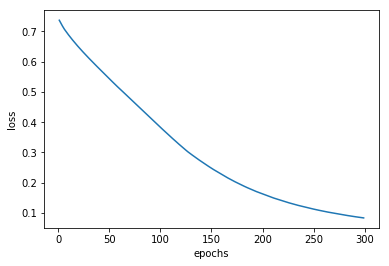

In [379]:
plt.plot(range(1,300),losses)
plt.xlabel("epochs")
plt.ylabel("loss")

In [380]:
x_test = Variable(torch.from_numpy(features_test)).float()

In [381]:
# Predictions
predictions = torch.max(net(x_test), 1)[1]
predictions


tensor([ 1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,
         1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,
         1,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,
         1,  0,  1,  0,  1,  1,  1,  1])

In [382]:
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, predictions.data.numpy())

1.0

In [419]:
test = Variable(torch.Tensor([ [200, 440]])).float()

In [420]:
net(x_test).max(dim=1)[1]

tensor([ 1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,
         1,  0,  1,  1,  1,  0,  0,  0,  1,  1,  1,  0,  1,  1,
         1,  1,  0,  1,  1,  1,  0,  0,  1,  0,  0,  0,  0,  1,
         1,  0,  1,  0,  1,  1,  1,  1])

In [421]:
labels_test

array([1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1])

In [422]:
test

tensor([[ 200.,  440.]])

In [423]:
test

tensor([[ 200.,  440.]])

In [424]:
net(test).max(dim=1)[1]

tensor([ 0])

## Now let us learn another function f(x) = x^2

In [314]:
def build_dataset_for_x_sq():
    # Given f(x) = x*x, is_f_x defines whether the function is satisfied
    data = []
    for i in range(1,100):
        data.append((i, i*i, 1)) # True
    for j in range(100, 201):
        data.append((j, 2*j, 0)) # Not true
    column_names = ["first_number","f_x", "is_f_x"]
    df = pd.DataFrame(data, columns=column_names)
    return df

In [315]:
df2 = build_dataset_for_x_sq()

In [318]:
df2.head()

,first_number,f_x,is_f_x
0,1,1,1
1,2,4,1
2,3,9,1
3,4,16,1
4,5,25,1


In [319]:
labels = df2.is_f_x.values
features = df2.drop(columns=['is_f_x']).values

In [425]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, shuffle=True, random_state=34)

In [439]:
optimizer = optim.SGD(net.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [440]:
def train():
    net.train()
    net.r
    losses = []
    for epoch in range(1,300):
        x_train = Variable(torch.from_numpy(features_train)).float()
        y_train = Variable(torch.from_numpy(labels_train)).long()
        y_pred = net(x_train)
        loss = criterion(y_pred, y_train)
        print ("epoch #", epoch)
        print (loss.item())
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    return losses

In [441]:
a = train()

epoch # 1
0.08329461514949799
epoch # 2
0.08285661786794662
epoch # 3
0.08239830285310745
epoch # 4
0.08194900304079056
epoch # 5
0.08150509744882584
epoch # 6
0.081052765250206
epoch # 7
0.08063855767250061
epoch # 8
0.08017837256193161
epoch # 9
0.07976789027452469
epoch # 10
0.07932697981595993
epoch # 11
0.07891629636287689
epoch # 12
0.0784917101264
epoch # 13
0.07807154953479767
epoch # 14
0.07767486572265625
epoch # 15
0.0772501528263092
epoch # 16
0.07686851918697357
epoch # 17
0.07644809037446976
epoch # 18
0.07606522738933563
epoch # 19
0.07566791027784348
epoch # 20
0.07527634501457214
epoch # 21
0.07489403337240219
epoch # 22
0.07450174540281296
epoch # 23
0.0741441622376442
epoch # 24
0.07374756783246994
epoch # 25
0.07338841259479523
epoch # 26
0.07301128655672073
epoch # 27
0.0726504847407341
epoch # 28
0.0722862035036087
epoch # 29
0.07191790640354156
epoch # 30
0.0715765431523323
epoch # 31
0.07120854407548904
epoch # 32
0.07087407261133194
epoch # 33
0.070511415600776

In [442]:
x_test = Variable(torch.from_numpy(features_test)).float()

In [445]:
accuracy_score(labels_test,net(x_test).max(dim=1)[1].data.numpy())

1.0

In [456]:
test = Variable(torch.Tensor([ [90, 90*91]])).float()

In [457]:
net(test).max(dim=1)[1]

tensor([ 1])

In [458]:
x_train = Variable(torch.from_numpy(features_train)).float()

In [463]:
accuracy_score(labels_train, net(x_train).max(dim=1)[1].data.numpy())

0.9933333333333333

In [464]:
def f_x(x):
    return x * x

In [465]:
f_x(12)

144